## Importing libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Lookind at the data


Using dataset from Kaggle https://www.kaggle.com/moltean/fruits/home

Total number of images: 65429.
Training set size: 48905 images (one fruit per image).
Test set size: 16421 images (one fruit per image).
Number of classes: 95 (fruits).

In [3]:
path = pathlib.Path('/home/jupyter/.fastai/data/fruits-360')

In [11]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/fruits-360/Test'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/readme.md'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/test-multiple_fruits'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/papers'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/LICENSE'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/models')]

In [12]:
path_train = path/'Training'
path_test = path/'Test'

In [13]:
path_train.ls()[:5]

[PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Pear Kaiser'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Apple Red 3'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Melon Piel de Sapo'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Apple Red Yellow 2')]

In [14]:
path_test.ls()[:5]

[PosixPath('/home/jupyter/.fastai/data/fruits-360/Test/Limes'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Test/Pear Kaiser'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Test/Apple Red 3'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Test/Melon Piel de Sapo'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Test/Apple Red Yellow 2')]

In [15]:
print(len(path_train.ls()), len(path_test.ls()))

95 95


In [16]:
fnames_train = get_image_files(path_train/'Limes')
fnames_test = get_image_files(path_test/'Limes')

In [17]:
fnames_train[:5]
#fnames_test[:5]

[PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes/280_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes/288_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes/r_30_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes/r_7_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/fruits-360/Training/Limes/154_100.jpg')]

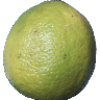

In [18]:
image = PIL.Image.open(fnames_test[2])
image

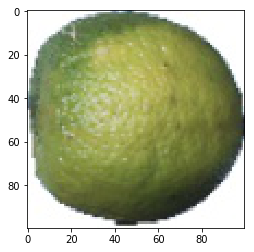

In [20]:
img = plt.imread(fnames_train[2])
plt.imshow(img);

### Prepare Data from images

In [67]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', valid_pct=None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [21]:
sz = 98
bs = 64
tfsm = get_transforms()
data = ImageDataBunch.from_folder(path, train='Training', valid='Test', ds_tfms=tfsm, size=sz, bs=bs
                                 ).normalize(imagenet_stats)

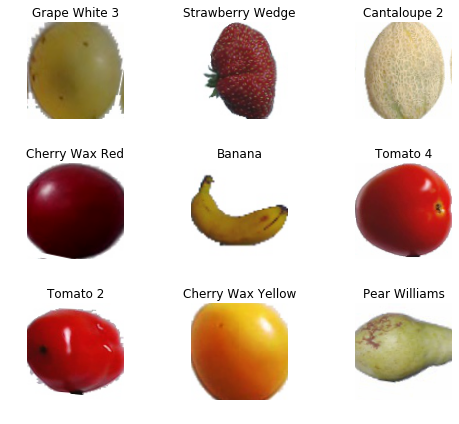

In [22]:
data.show_batch(rows=3, figsize=(7,6))

In [70]:
print(data.classes)
len(data.classes), data.c

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Kaiser', 'Pear Monster', 'Pear Williams', 'Pepino', 'Phy

(95, 95)

## Training: resnet34

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [73]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.109745,0.056822,0.019000
2,0.047542,0.037414,0.011327
3,0.011914,0.017397,0.005724
4,0.009647,0.009528,0.003593


In [74]:
learn.save('resnet34-stage-1', return_path=1)

PosixPath('/home/jupyter/.fastai/data/fruits-360/models/resnet34-stage-1.pth')

In [9]:
learn.load('resnet34-stage-1');

## Results

In [11]:
#interp = learn.interpret()
interp = ClassificationInterpretation.from_learner(learn)

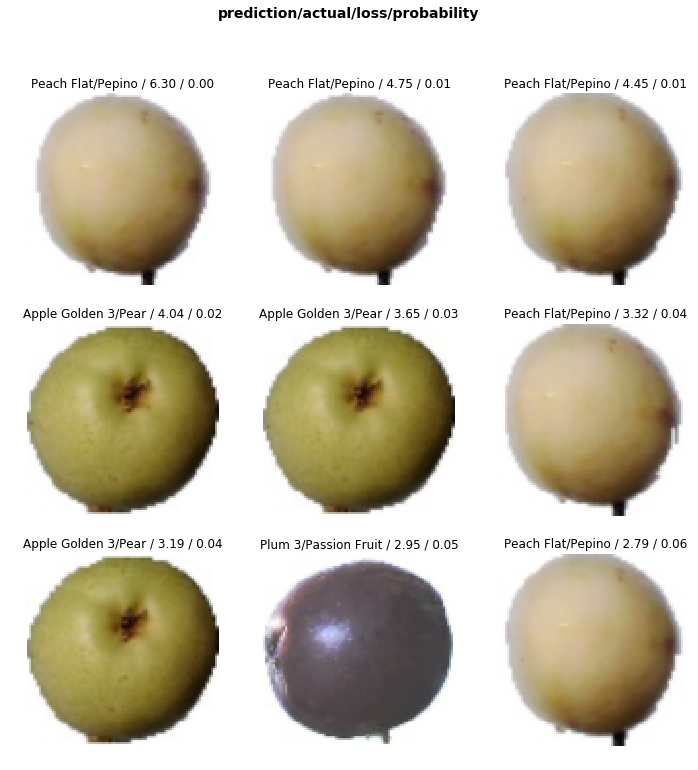

In [12]:
interp.plot_top_losses(9, figsize=(12,12))

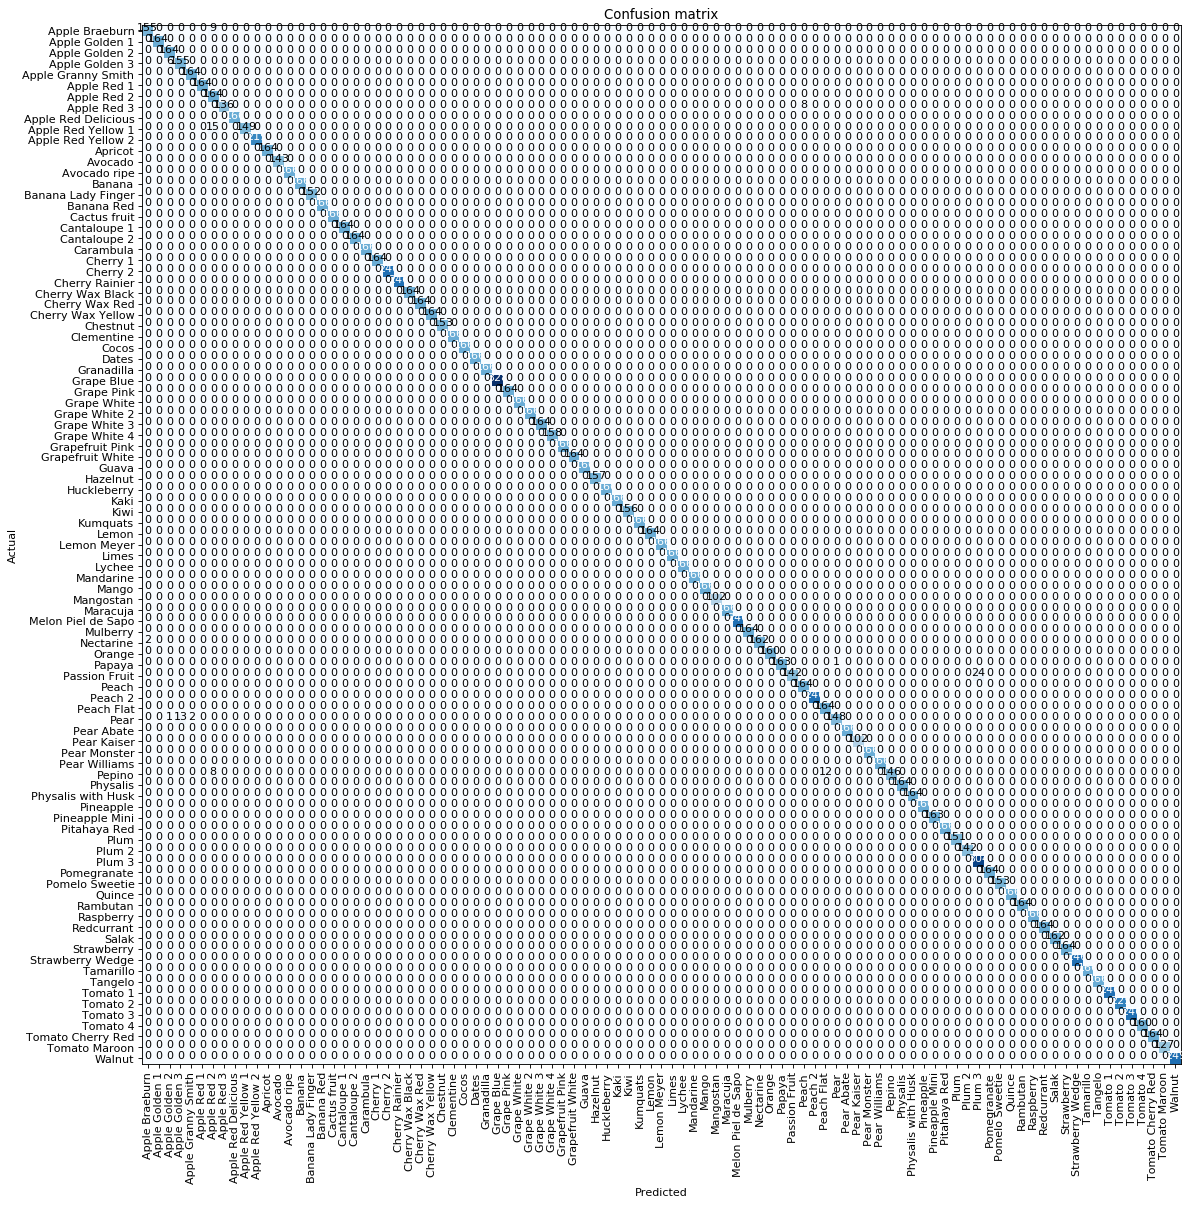

In [39]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=80)

In [77]:
interp.most_confused(min_val=2)

[('Pepino', 'Peach Flat', 16),
 ('Passion Fruit', 'Plum 3', 14),
 ('Pear', 'Apple Granny Smith', 10),
 ('Apple Golden 3', 'Apple Golden 2', 8),
 ('Apple Red 3', 'Peach', 3),
 ('Pear', 'Apple Golden 3', 3)]

## Unfreezing, fine-tuning and learning rates 

In [78]:
learn.unfreeze()

In [79]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.006126,0.002681,0.000792


In [14]:
learn.load('resnet34-stage-1');

In [35]:
learn.lr_find(start_lr=1e-13, end_lr=1e-03)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


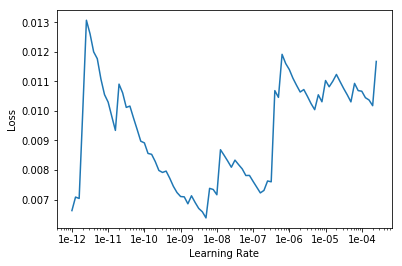

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(2, max_lr=slice(1e-11,1e-09))

epoch,train_loss,valid_loss,error_rate
1,0.007562,0.009604,0.003288
2,0.006547,0.010499,0.003593


## Training: resnet50

In [4]:
sz = 299
bs = 32
tfsm = get_transforms()
data = ImageDataBunch.from_folder(path, train='Training', valid='Test', ds_tfms=tfsm, size=sz, bs=bs
                                 ).normalize(imagenet_stats)

In [5]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.066233,0.018603,0.004811
2,0.018788,0.003091,0.001035
3,0.003675,0.001327,0.000365
4,0.000597,0.000958,0.000244


In [35]:
learn.save('resnet50-stage-1')

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


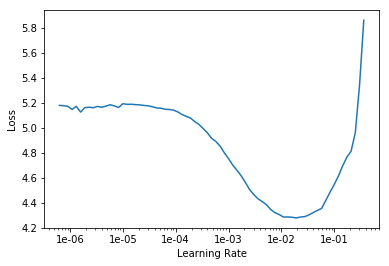

In [17]:
learn.recorder.plot()

In [14]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(1e-04,1e-02))

epoch,train_loss,valid_loss,error_rate
1,0.145856,0.028576,0.010596
2,0.004985,0.006615,0.001888


In [7]:
learn.load('resnet50-stage-1');

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


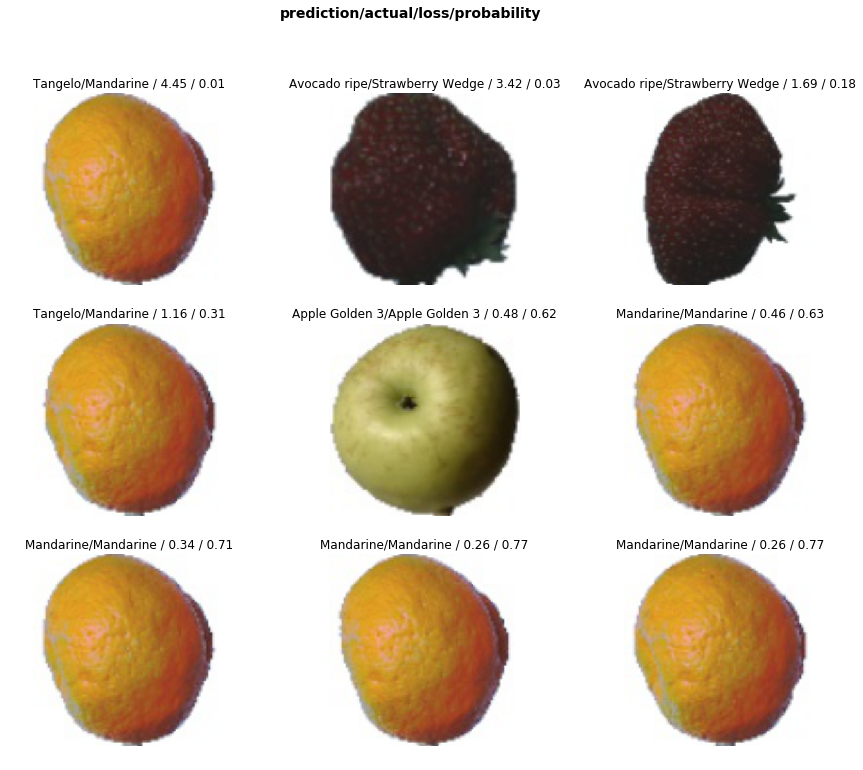

In [22]:
interp.plot_top_losses(9, figsize=(15,12))

In [17]:
interp.most_confused(min_val=1)

[('Mandarine', 'Tangelo', 2), ('Strawberry Wedge', 'Avocado ripe', 2)]

# Single Image Prediction

In [2]:
from fastai.vision import *

In [6]:
path = pathlib.Path('/home/jupyter/.fastai/data/fruits-360')
path_train = path/'Training'
path_train.ls();

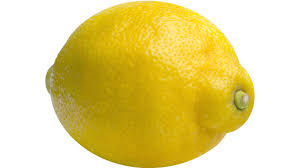

In [12]:
single_img_path = pathlib.Path('/home/jupyter/.fastai/data/fruits-360/fruits_single_image_test/')
fnames = get_image_files(single_img_path)
img1 = PIL.Image.open(fnames[0])
img1

In [46]:
sz = 299
bs = 32
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='Training', valid="Test", test='fruits_single_image_test', ds_tfms=tfms, size=sz, bs=bs
                                 ).normalize(imagenet_stats)

In [47]:
learn = create_cnn(data, models.resnet50, metrics=error_rate).load('resnet50-stage-1')

In [48]:
data.train_ds

LabelList
y: CategoryList (48905 items)
[Category Limes, Category Limes, Category Limes, Category Limes, Category Limes]...
Path: /home/jupyter/.fastai/data/fruits-360
x: ImageItemList (48905 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: /home/jupyter/.fastai/data/fruits-360

In [49]:
learn.export()

In [50]:
learn.path

PosixPath('/home/jupyter/.fastai/data/fruits-360')

In [51]:
learn = load_learner(path)

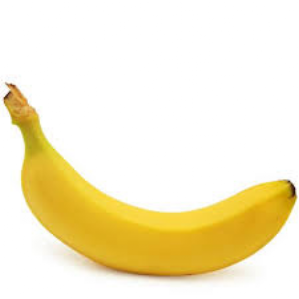

In [61]:
img,class_label = data.test_ds[4]
img

In [63]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Banana Lady Finger

It's predicting good for Banana but for other fruits from 'fruits_single_image_test' its not.